In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
url = 'https://raw.githubusercontent.com/Kaju-barnwal/DataSets/refs/heads/main/Maternal%20Health%20Risk%20Data%20Set.csv'
data = pd.read_csv(url)

In [3]:
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Checking the dataset distribution

In [5]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
data['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [7]:
data['RiskLevel'].value_counts()/len(data)

,count
RiskLevel,
low risk,0.400394
mid risk,0.331361
high risk,0.268245


<Axes: ylabel='count'>

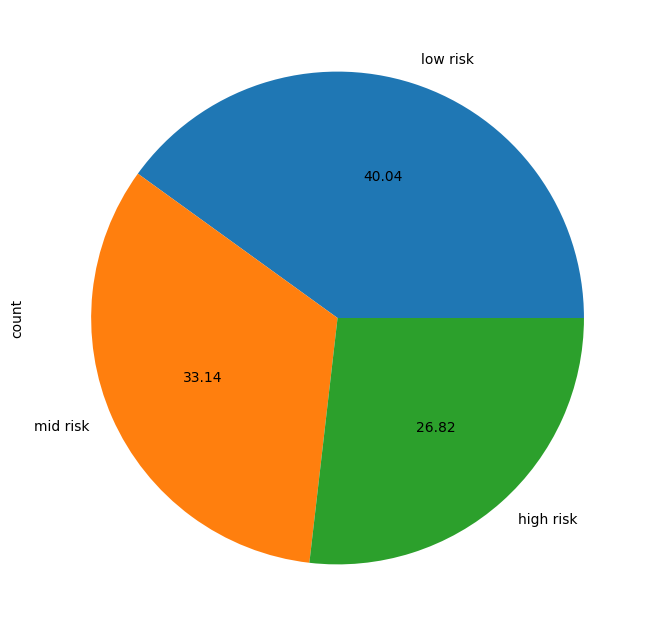

In [8]:
data['RiskLevel'].value_counts().plot.pie(autopct='%.2f',figsize=(8,8))

Seperating dependent and independent variable

In [9]:
X=data.drop(columns=['RiskLevel'])
Y=data['RiskLevel']

In [10]:
print(X.shape)
print(Y.shape)

(1014, 6)
(1014,)


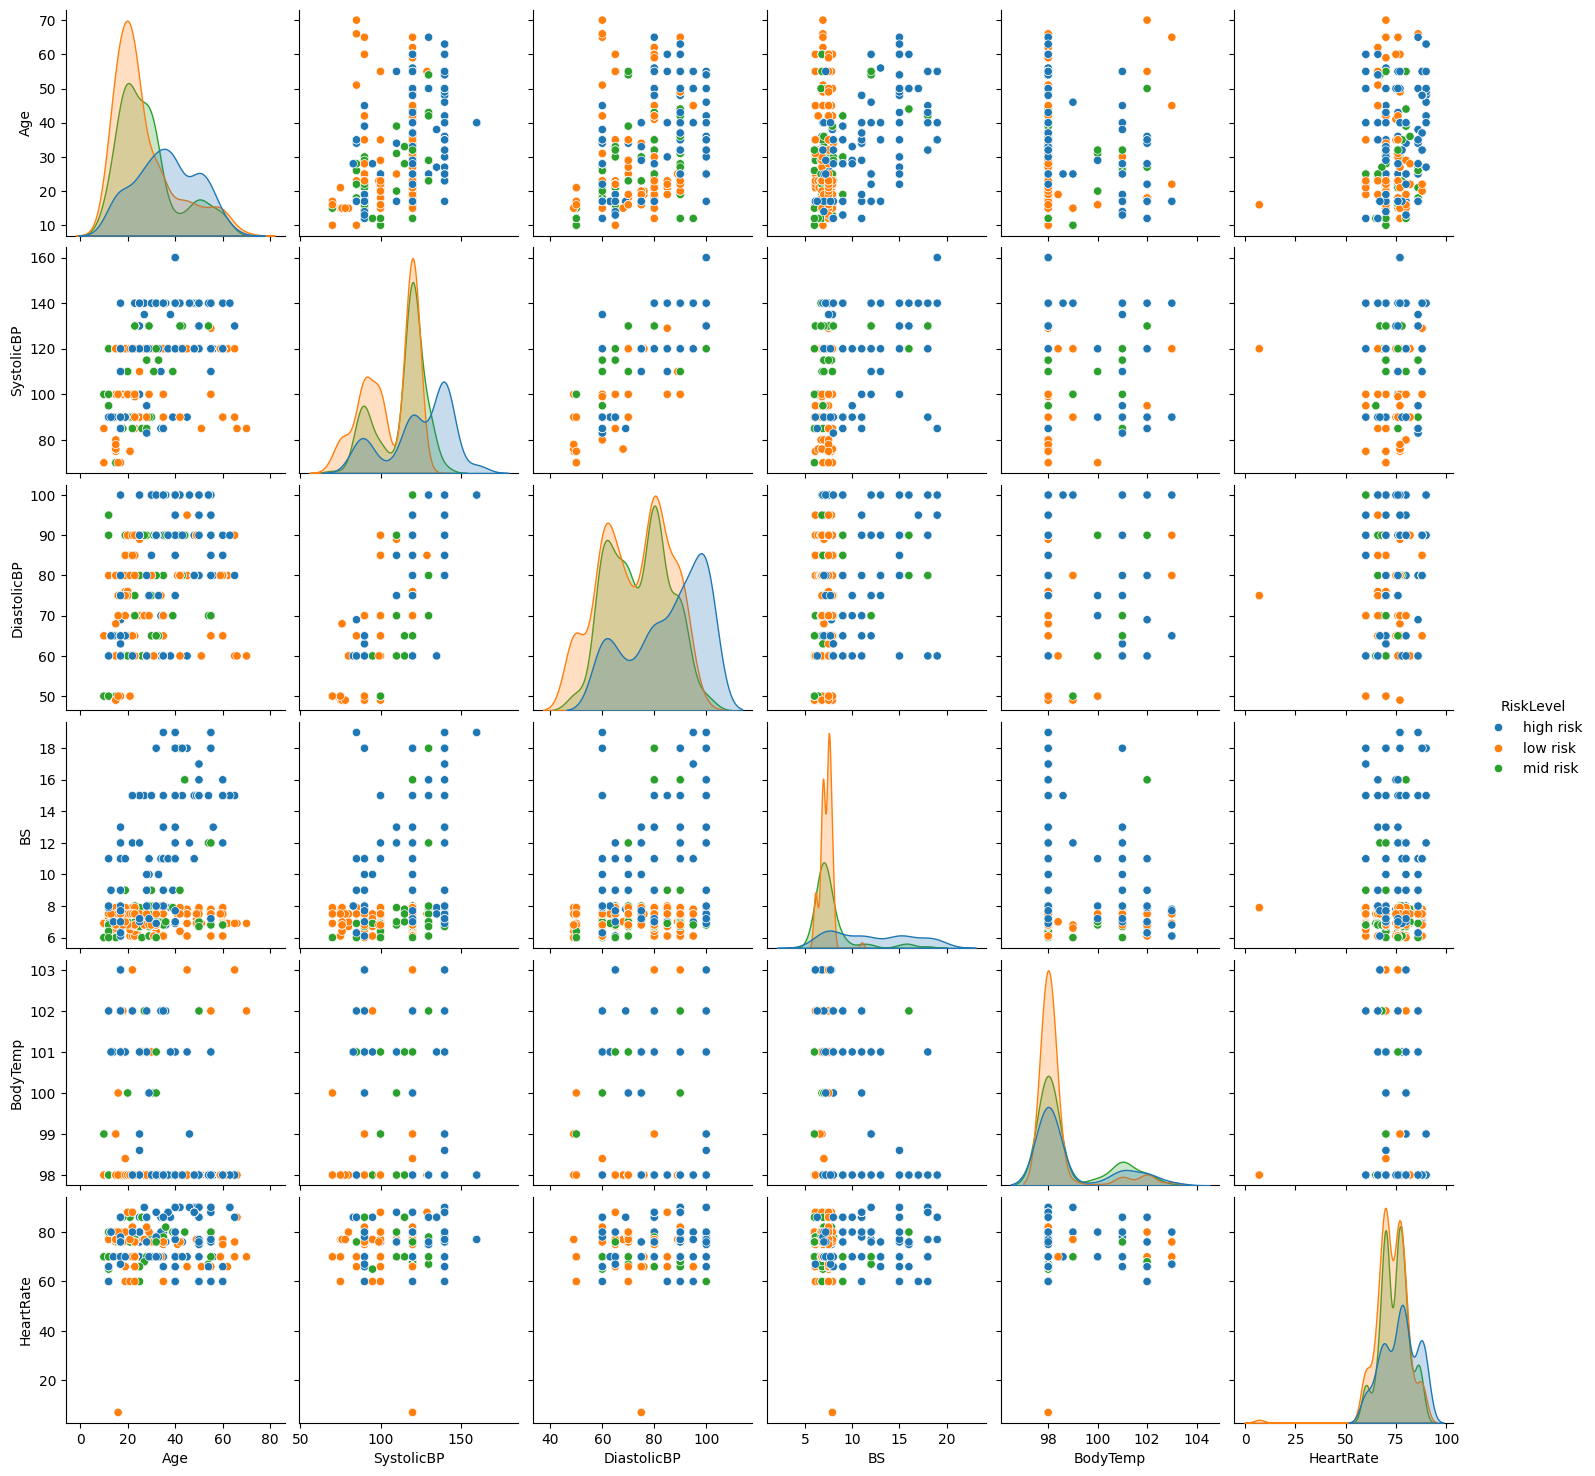

In [11]:
sns.pairplot(data,hue='RiskLevel')

<Axes: xlabel='Age', ylabel='count'>

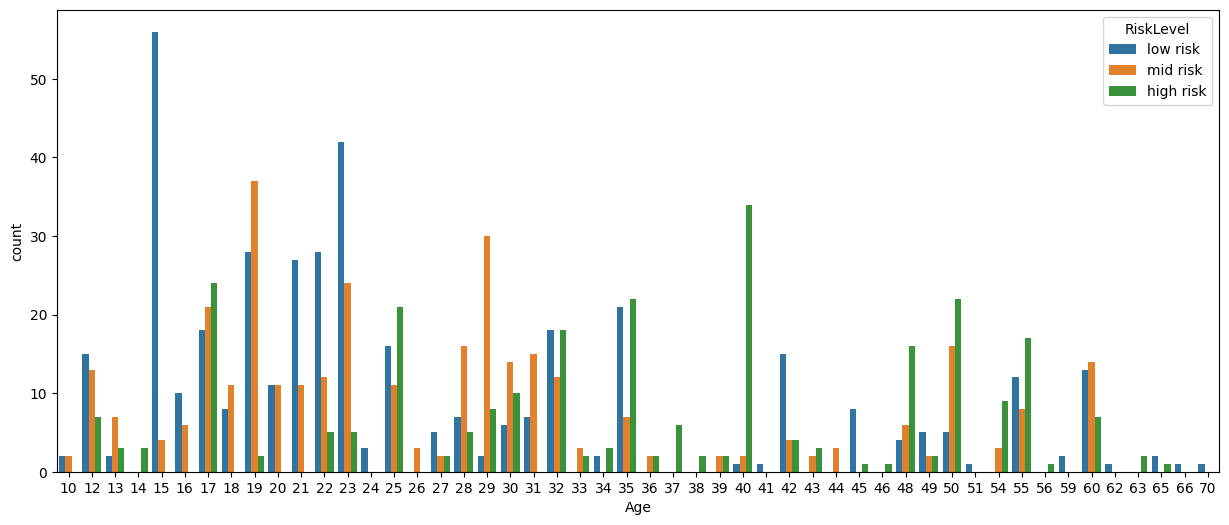

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age', hue='RiskLevel', data=data)

In [13]:
numerical_data = data.select_dtypes(include=[np.number])
correlation = numerical_data.corr()

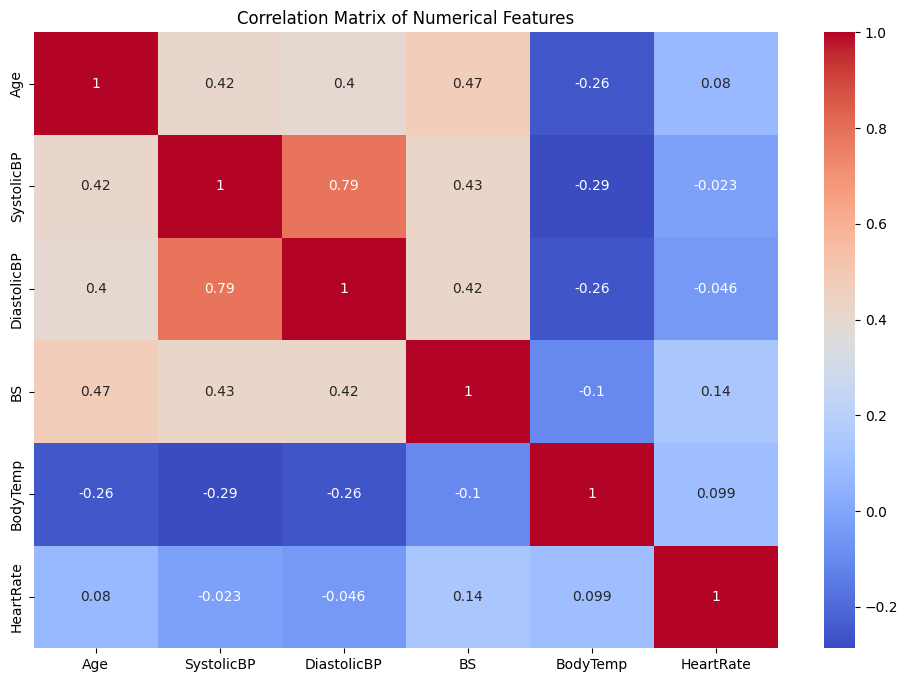

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

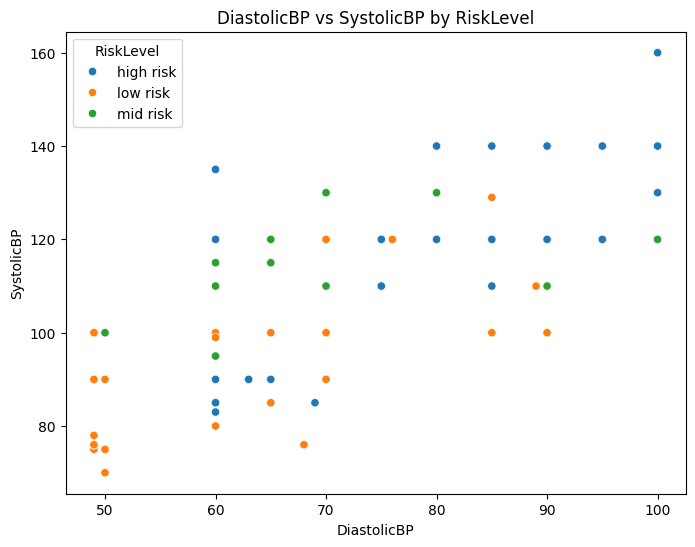

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='DiastolicBP', y='SystolicBP', hue='RiskLevel')
plt.title("DiastolicBP vs SystolicBP by RiskLevel")
plt.show()

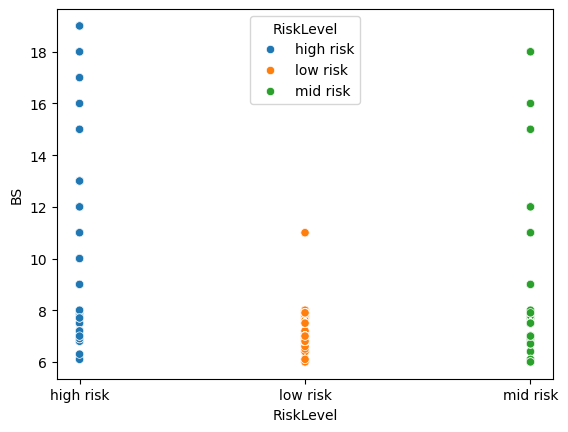

In [16]:
sns.scatterplot(x='RiskLevel', y='BS', hue='RiskLevel', data=data)
plt.show()

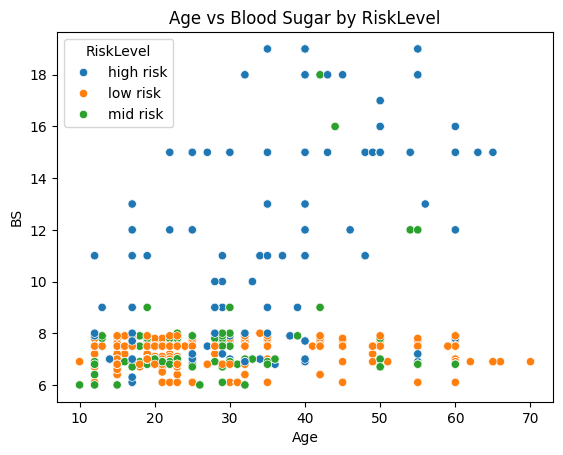

In [17]:
sns.scatterplot(x='Age', y='BS', hue='RiskLevel', data=data)
plt.title("Age vs Blood Sugar by RiskLevel")
plt.show()

/tmp/ipython-input-1929940598.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="RiskLevel", y="SystolicBP", data=data, ax=axes[0], palette="Set2")
/tmp/ipython-input-1929940598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="RiskLevel", y="DiastolicBP", data=data, ax=axes[1], palette="Set3")


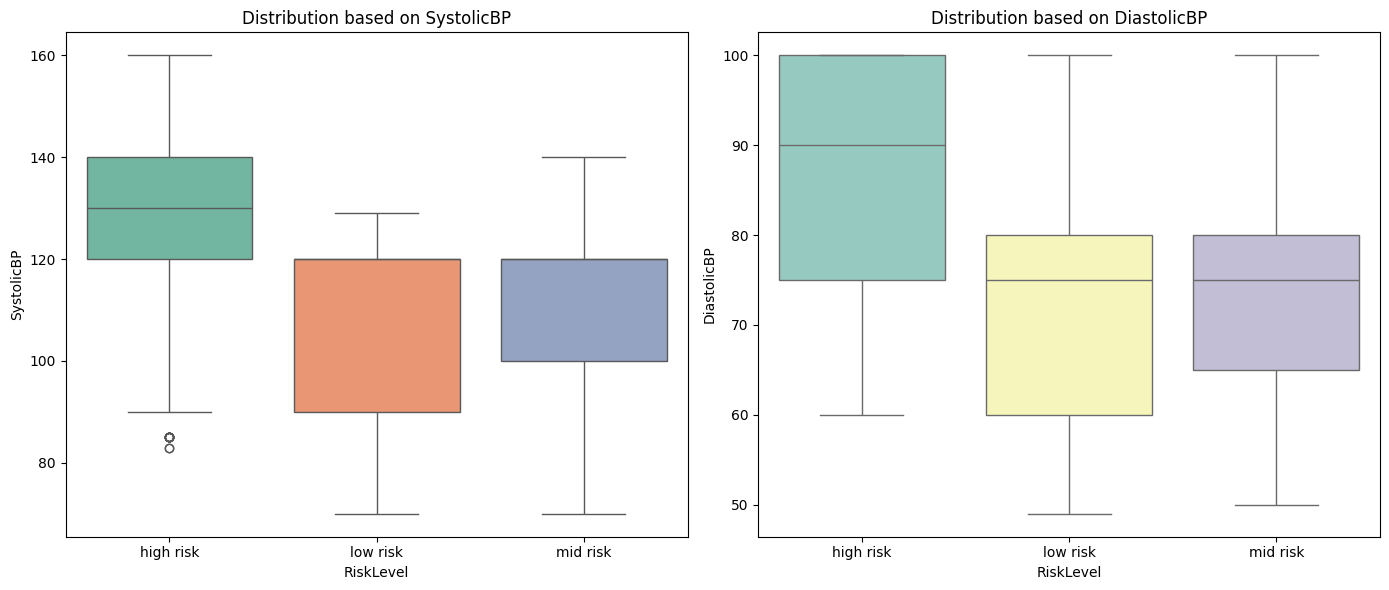

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# SystolicBP
sns.boxplot(x="RiskLevel", y="SystolicBP", data=data, ax=axes[0], palette="Set2")
axes[0].set_title("Distribution based on SystolicBP")

# DiastolicBP
sns.boxplot(x="RiskLevel", y="DiastolicBP", data=data, ax=axes[1], palette="Set3")
axes[1].set_title("Distribution based on DiastolicBP")

plt.tight_layout()
plt.show()

Scaling the dataset

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

Splitting the dataset


In [20]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.70,stratify=Y,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((709, 6), (305, 6), (709,), (305,))

In [21]:
print(x_train.size)
print(x_test.size)

4254
1830


Model Building, predictions and odds ratio

Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression as LR
classifier=LR(class_weight='balanced')
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_test)
predicted_probabilities=classifier.predict_proba(x_test)
predicted_values
predicted_probabilities,predicted_probabilities.shape

(array([[1.08770229e-01, 4.38092336e-01, 4.53137436e-01],
        [3.67335631e-01, 2.25047331e-01, 4.07617038e-01],
        [3.52013526e-02, 6.71761409e-01, 2.93037239e-01],
        [1.24795004e-01, 2.69708945e-01, 6.05496051e-01],
        [7.50977162e-02, 6.06852471e-01, 3.18049812e-01],
        [1.70228400e-01, 1.89875424e-01, 6.39896176e-01],
        [7.01495263e-02, 5.63918579e-01, 3.65931894e-01],
        [3.54390712e-02, 4.16537002e-01, 5.48023927e-01],
        [6.90734039e-01, 4.03307998e-02, 2.68935162e-01],
        [5.64654497e-01, 7.21446224e-02, 3.63200880e-01],
        [4.38362108e-01, 1.75989616e-01, 3.85648277e-01],
        [3.43283948e-01, 2.00799982e-01, 4.55916070e-01],
        [2.39028735e-02, 7.09876209e-01, 2.66220918e-01],
        [9.66203872e-02, 4.26925721e-01, 4.76453892e-01],
        [1.15178037e-01, 4.31269658e-01, 4.53552305e-01],
        [1.90160540e-02, 7.66675626e-01, 2.14308320e-01],
        [3.74714324e-02, 4.08489452e-01, 5.54039115e-01],
        [9.491

In [23]:
print(y_train.shape)
print(predicted_values.shape)
print(y_test.shape)

(709,)
(305,)
(305,)


1. Confusion matrix(Logistic Regression)

In [24]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predicted_values)
cf

array([[60,  5, 17],
       [ 6, 86, 30],
       [23, 37, 41]])

In [25]:
classifier.score(x_test,y_test)

0.6131147540983607

In [26]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)

In [27]:
print(precision)
print(recall)
print(f1)
print(support)

[0.6741573  0.671875   0.46590909]
[0.73170732 0.70491803 0.40594059]
[0.70175439 0.688      0.43386243]
[ 82 122 101]


<Axes: >

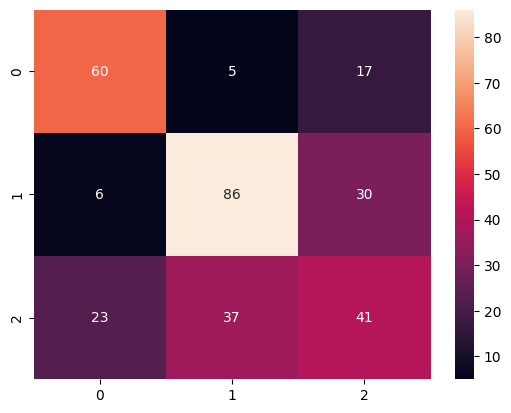

In [28]:
sns.heatmap(confusion_matrix(y_test,predicted_values),annot=True)

In [29]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

   high risk       0.67      0.73      0.70        82
    low risk       0.67      0.70      0.69       122
    mid risk       0.47      0.41      0.43       101

    accuracy                           0.61       305
   macro avg       0.60      0.61      0.61       305
weighted avg       0.60      0.61      0.61       305



Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [31]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
pred= model.predict(x_test)

<Axes: >

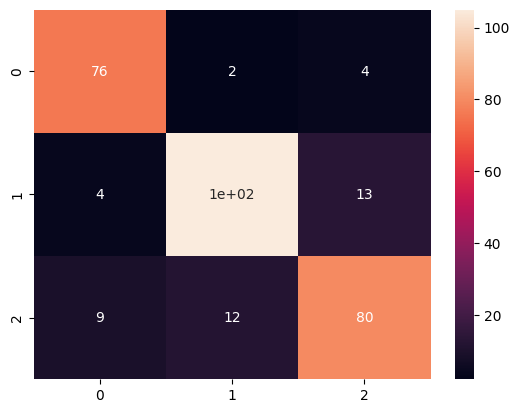

In [33]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [34]:
model.score(x_test,y_test)

0.8557377049180328

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

   high risk       0.85      0.93      0.89        82
    low risk       0.88      0.86      0.87       122
    mid risk       0.82      0.79      0.81       101

    accuracy                           0.86       305
   macro avg       0.85      0.86      0.86       305
weighted avg       0.86      0.86      0.86       305



In [36]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train= scale.fit_transform(x_train)
x_test= scale.transform(x_test)

In [37]:
x_train

array([[-0.34096191,  0.34432827,  0.9405713 , -0.62741662,  1.73365201,
         0.75085067],
       [ 0.7672685 ,  2.58609821,  1.67573286,  3.08934025, -0.47759639,
         0.38763498],
       [-0.63649001, -1.33699918, -2.00007494, -0.56698155, -0.47759639,
        -1.67058725],
       ...,
       [-0.93201812, -1.33699918, -1.04436491, -0.56698155,  1.73365201,
        -0.45986829],
       [-1.07978217, -2.12161866, -2.0735911 , -0.71806923, -0.47759639,
         0.38763498],
       [-0.63649001, -1.33699918, -0.8973326 , -0.38567634, -0.47759639,
         0.26656309]])

In [38]:
modelDTC= DecisionTreeClassifier(criterion='gini', random_state=101)
modelDTC.fit(x_train, y_train)

DecisionTreeClassifier(random_state=101)

In [39]:
y_pred= modelDTC.predict(x_test)

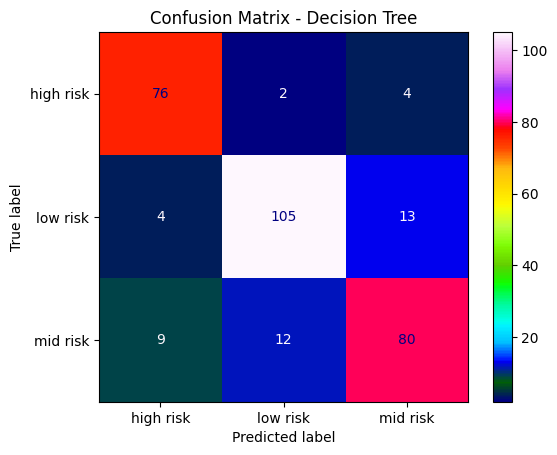

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelDTC.classes_)
disp.plot(cmap="gist_ncar")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [41]:
modelDTC.score(x_test,y_test)

0.8557377049180328

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   high risk       0.85      0.93      0.89        82
    low risk       0.88      0.86      0.87       122
    mid risk       0.82      0.79      0.81       101

    accuracy                           0.86       305
   macro avg       0.85      0.86      0.86       305
weighted avg       0.86      0.86      0.86       305



Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
RF= RandomForestClassifier(criterion='gini')
RF.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
predict=RF.predict(x_test)

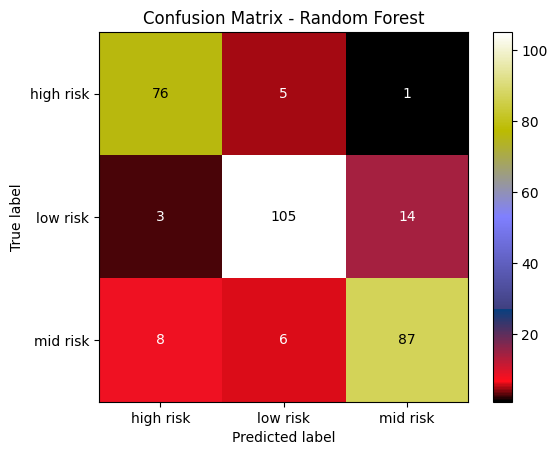

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap="gist_stern")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [47]:
RF.score(x_test,y_test)

0.8786885245901639

In [48]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

   high risk       0.87      0.93      0.90        82
    low risk       0.91      0.86      0.88       122
    mid risk       0.85      0.86      0.86       101

    accuracy                           0.88       305
   macro avg       0.88      0.88      0.88       305
weighted avg       0.88      0.88      0.88       305



In [49]:
RF2= RandomForestClassifier(criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=500)

In [50]:
RF2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=500)

In [51]:
rf_pred=RF2.predict(x_test)

In [52]:
rf_pred=RF2.predict(x_test)

In [53]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

   high risk       0.87      0.93      0.90        82
    low risk       0.89      0.88      0.88       122
    mid risk       0.87      0.84      0.85       101

    accuracy                           0.88       305
   macro avg       0.88      0.88      0.88       305
weighted avg       0.88      0.88      0.88       305



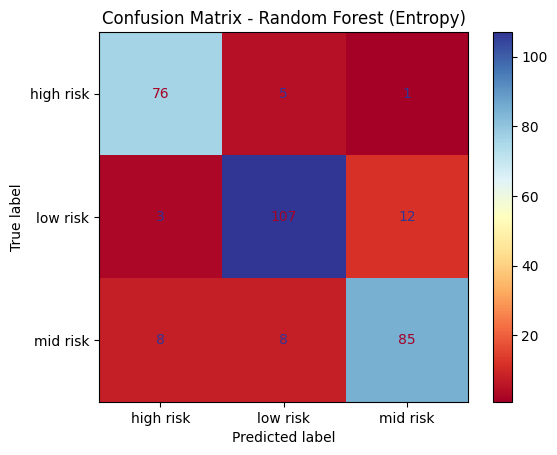

In [54]:
# Confusion Matrix for RF2
cm2 = confusion_matrix(y_test, rf_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=RF2.classes_)
disp2.plot(cmap="RdYlBu")
plt.title("Confusion Matrix - Random Forest (Entropy)")
plt.show()

Support Vector Classification

In [55]:
from sklearn.svm import SVC

In [56]:
svc= SVC(kernel='poly')
svc.fit(x_train,y_train)

SVC(kernel='poly')

In [57]:
svc_pred=svc.predict(x_test)

In [58]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

   high risk       0.84      0.78      0.81        82
    low risk       0.61      0.92      0.73       122
    mid risk       0.66      0.29      0.40       101

    accuracy                           0.67       305
   macro avg       0.70      0.66      0.65       305
weighted avg       0.69      0.67      0.64       305



In [59]:
svc.score(x_test,y_test)

0.6721311475409836

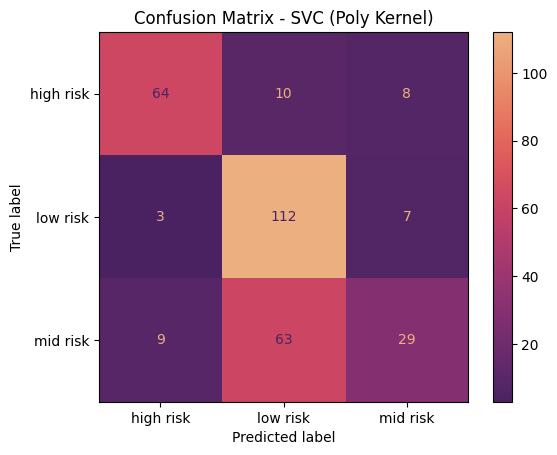

In [60]:
# Confusion matrix
cm = confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap="flare_r")
plt.title("Confusion Matrix - SVC (Poly Kernel)")
plt.show()